In [1]:
import pandas as pd
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#Defining Neural Network
model=models.Sequential()
model.add(layers.Conv2D(32,(10,20),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(2,2),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 9, 32)         6432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 4, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 3, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
____________________________________________________

In [3]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


(<matplotlib.image.AxesImage at 0x7f0923535358>, 5)

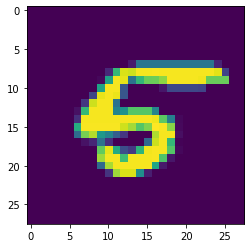

In [4]:
#test
n=random.randint(0,60000)
plt.imshow(x_train[n]),y_train[n]

In [5]:
#Normalizing MNIST
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

In [6]:
#Reshaping MNIST
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [7]:
#Converting Labels to vector
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [8]:
#test
y_train[9098]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
#Defining Learning parameter
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy','categorical_accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=100)

Epoch 1/20
600/600 [==============================] - 26s 42ms/step - loss: 1.7162 - accuracy: 0.5213 - categorical_accuracy: 0.5213
Epoch 2/20
600/600 [==============================] - 25s 42ms/step - loss: 0.3875 - accuracy: 0.8935 - categorical_accuracy: 0.8935
Epoch 3/20
600/600 [==============================] - 26s 43ms/step - loss: 0.2788 - accuracy: 0.9206 - categorical_accuracy: 0.9206
Epoch 4/20
600/600 [==============================] - 25s 42ms/step - loss: 0.2362 - accuracy: 0.9317 - categorical_accuracy: 0.9317
Epoch 5/20
600/600 [==============================] - 25s 42ms/step - loss: 0.2046 - accuracy: 0.9414 - categorical_accuracy: 0.9414
Epoch 6/20
600/600 [==============================] - 25s 42ms/step - loss: 0.1829 - accuracy: 0.9473 - categorical_accuracy: 0.9473
Epoch 7/20
600/600 [==============================] - 25s 42ms/step - loss: 0.1703 - accuracy: 0.9503 - categorical_accuracy: 0.9503
Epoch 8/20
600/600 [==============================] - 26s 43ms/step -

In [10]:
#Evaluating
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9740 - categorical_accuracy: 0.9740


[0.08342092484235764, 0.9739999771118164, 0.9739999771118164]

In [11]:
#Predict
pred=model.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
pred_list=[]
y_test_list=[]
for i in range(len(y_test)):
  pred_list.append(np.argmax(pred[i]))
  y_test_list.append(np.argmax(y_test[i]))
confusion_matrix(pred_list,y_test_list)

array([[ 966,    0,    6,    2,    1,    5,    7,    1,    3,    4],
       [   0, 1122,    2,    0,    0,    1,    3,    7,    0,    4],
       [   1,    2,  993,    2,    3,    0,    0,   13,    3,    0],
       [   1,    2,    9,  989,    0,   14,    1,    1,    6,    3],
       [   0,    0,    5,    0,  960,    1,    5,    0,    4,    4],
       [   1,    2,    1,    3,    0,  856,    4,    0,    2,    4],
       [   5,    0,    3,    0,    3,    6,  933,    0,    2,    1],
       [   2,    0,    5,    5,    0,    1,    1,  996,    3,    5],
       [   3,    7,    5,    3,    3,    6,    4,    2,  946,    5],
       [   1,    0,    3,    6,   12,    2,    0,    8,    5,  979]])